In [18]:
from qutip import *
import numpy as np

Setting parameters

In [2]:
# Defining the system Hamiltonian
Hsys = 0.5 * sigmaz()
# Initial state of the system.
rho0 = basis(2, 0) * basis(2, 0).dag()
tlist=np.linspace(0,10,100)
# defining Ohmic bath properties
alpha=0.05
T=1
wc=1
s=1


Obtaining an Ohmic Bath via Correlation functions

In [3]:
obp=heom.OhmicBath(T,sigmax(),alpha,wc,s)

Fitting The real Part of the correlation function ..... 
Parameters [k=1]: 
 	 lam=[0.0400059] 
 	 gamma=[-0.93092427] 
 	 w0=[1.45452728e-11] 
 Normalized RMSE = 9.285525683887682e-05
Parameters [k=2]: 
 	 lam=[0.01838259 0.02127905] 
 	 gamma=[-0.51510725 -1.01867567] 
 	 w0=[8.13990954e-23 9.62439167e-01] 
 Normalized RMSE = 4.9001478947984185e-05
Parameters [k=3]: 
 	 lam=[ 0.00505853  0.04108794 -0.00938488] 
 	 gamma=[-0.28450327 -1.31653786 -4.7192563 ] 
 	 w0=[5.32913163e-18 4.76861197e-18 4.89079601e+00] 
 Normalized RMSE = 1.3300348986564378e-05
Parameters [k=4]: 
 	 lam=[ 0.0114574   0.35536488  0.00614465 -0.33426881] 
 	 gamma=[-0.65465667 -0.33942822 -0.86761164 -0.33102889] 
 	 w0=[0.97216284 0.1842804  2.03199239 0.18635836] 
 Normalized RMSE = 2.934218309155666e-05
Parameters [k=5]: 
 	 lam=[ 3.56995371e-04  2.73262070e-02  4.50298483e-01  4.95009320e-03
 -4.46453199e-01] 
 	 gamma=[-0.07584012 -1.08735982 -4.55944252 -0.35491248 -4.66434324] 
 	 w0=[5.89921272e-34 9.8

In [4]:
options = {'nsteps':15000, 'store_states':True, 'rtol':1e-12, 'atol':1e-12, 'method':"bdf"}
HEOM_corr_fit = heom.HEOMSolver(Hsys, obp.Bath_corr, max_depth=4, options=options)
result_corr=HEOM_corr_fit.run(rho0,tlist)

10.1%. Run time:   0.48s. Est. time left: 00:00:00:04
20.2%. Run time:   0.72s. Est. time left: 00:00:00:02
30.3%. Run time:   0.89s. Est. time left: 00:00:00:02
40.4%. Run time:   1.08s. Est. time left: 00:00:00:01
50.5%. Run time:   1.26s. Est. time left: 00:00:00:01
60.6%. Run time:   1.43s. Est. time left: 00:00:00:00
70.7%. Run time:   1.62s. Est. time left: 00:00:00:00
80.8%. Run time:   1.80s. Est. time left: 00:00:00:00
90.9%. Run time:   1.98s. Est. time left: 00:00:00:00
100.0%. Run time:   2.13s. Est. time left: 00:00:00:00
Total run time:   2.13s


Obtaining an Ohmic Bath via Spectral density

If the spectral method is specified than the Ohmic bath is obtained by fitting the ohmic spectral density 

In [5]:
obp2=heom.OhmicBath(T,sigmax(),alpha,wc,s,Nk=4,method='spectral')

Fitting the Spectral density with k  Underdamped Drude Lorentz .......
Parameters [k=1]: 
 	 lam=[0.09457428] 
 	 gamma=[1.77937199] 
 	 w0=[0.10001] 
 Normalized RMSE = 0.00014398396812732766
Parameters [k=2]: 
 	 lam=[0.03403633 0.05018147] 
 	 gamma=[1.24962434 1.43433081] 
 	 w0=[0.10001    1.80573553] 
 Normalized RMSE = 7.111440183258405e-05
Parameters [k=3]: 
 	 lam=[-0.05569379  0.00403359  0.11663765] 
 	 gamma=[4.17975242 0.73506475 2.13429103] 
 	 w0=[4.66786664 0.10001    0.10001   ] 
 Normalized RMSE = 1.1895125773352943e-05
Parameters [k=4]: 
 	 lam=[ 0.00016261 -0.06777505  0.00923493  0.1217659 ] 
 	 gamma=[0.30722683 4.29819612 1.00218015 2.2958791 ] 
 	 w0=[0.10001    3.98389103 0.10001    0.10001   ] 
 Normalized RMSE = 2.0705179688381157e-06
Parameters [k=5]: 
 	 lam=[-3.45169868e-01 -7.31351150e-01  1.42042940e-04  4.12654516e-01
  7.27871501e-01] 
 	 gamma=[1.31942962 4.67723361 0.29373219 1.3839406  4.55989746] 
 	 w0=[0.284329   1.69285141 0.10001    0.10001    

In [6]:
HEOM_spectral_fit = heom.HEOMSolver(Hsys, obp2.Bath_spec, max_depth=4, options=options)
result_spectral=HEOM_spectral_fit.run(rho0,tlist)

10.1%. Run time:   0.68s. Est. time left: 00:00:00:06
20.2%. Run time:   1.04s. Est. time left: 00:00:00:04
30.3%. Run time:   1.29s. Est. time left: 00:00:00:02
40.4%. Run time:   1.53s. Est. time left: 00:00:00:02
50.5%. Run time:   1.77s. Est. time left: 00:00:00:01
60.6%. Run time:   2.05s. Est. time left: 00:00:00:01
70.7%. Run time:   2.29s. Est. time left: 00:00:00:00
80.8%. Run time:   2.54s. Est. time left: 00:00:00:00
90.9%. Run time:   2.76s. Est. time left: 00:00:00:00
100.0%. Run time:   3.04s. Est. time left: 00:00:00:00
Total run time:   3.04s


Let us see the results from both ways of obtaining the ohmic bath parameters 

In [7]:
import matplotlib.pyplot as plt
def projection(result,i,j):
    return [result.states[k][i,j] for k in range(len(result.states))]

/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


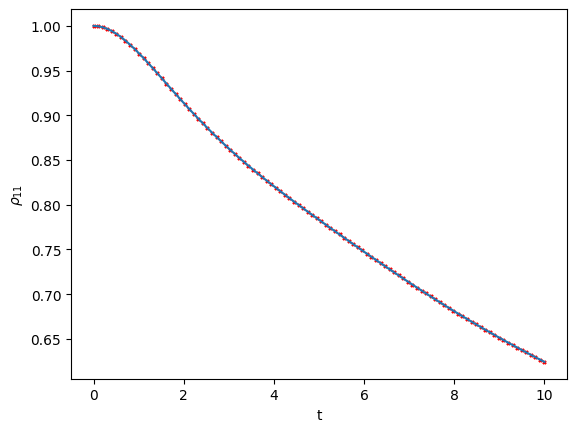

In [8]:
plt.plot(tlist,projection(result_spectral,0,0))
plt.scatter(tlist,projection(result_corr,0,0),s=5,marker='x',color='red')
plt.xlabel('t')
plt.ylabel(r'$\rho_{11}$')
plt.show()

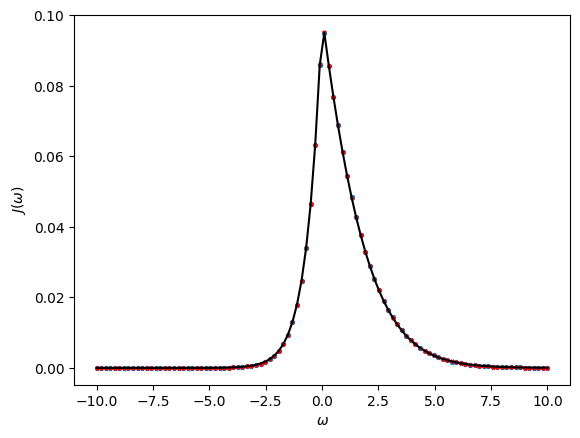

In [9]:
w=np.linspace(-10,10,100)
plt.scatter(w,obp.corr_spectrum_approx(w),s=8)
plt.scatter(w,obp2.spec_spectrum_approx(w),s=5,marker='x',color='red')
plt.plot(w,obp.ohmic_power_spectrum(w),color='k')
plt.ylabel(r'$J( \omega )$')
plt.xlabel(r'$\omega$')
plt.show()